In [1]:
%matplotlib inline
from IPython.core.display import display, HTML  
display(HTML("<style>.container { width:95% !important; }</style>")) #bigger notebook

In [2]:
from __future__ import division

import tensorflow as tf
print 'TensorFlow version:', tf.__version__

import numpy as np
import datetime
from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set() # use seaborn plotting defaults

TensorFlow version: 0.7.1


$A^n + B^n$ : element-wise

+ Multi GPU: Compute $A^n$  and $B^n$ on 2 different GPUs and '+' operation is on CPU
    
+ Single GPU: Compute $A^n$  and $B^n$ on the same GPU and '+' operation is on CPU

Note: The first call to eval() or run() is typically much slower than subsequent calls since it needs to setup the session. Subsequent calls to eval/run are typically much faster


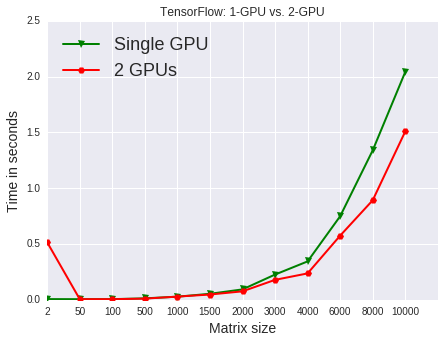

[0.006296, 0.005555, 0.005774, 0.013034, 0.027866, 0.053845, 0.093119, 0.226194, 0.344079, 0.748718, 1.338868, 2.041765]
[0.514945, 0.005557, 0.005683, 0.01046, 0.028645, 0.04735, 0.075841, 0.178726, 0.236512, 0.574909, 0.891859, 1.508543]
Matrix size        1-GPU     2-GPU
--------------  --------  --------
(2, 2)          0.006296  0.514945
(50, 50)        0.005555  0.005557
(100, 100)      0.005774  0.005683
(500, 500)      0.013034  0.01046
(1000, 1000)    0.027866  0.028645
(1500, 1500)    0.053845  0.04735
(2000, 2000)    0.093119  0.075841
(3000, 3000)    0.226194  0.178726
(4000, 4000)    0.344079  0.236512
(6000, 6000)    0.748718  0.574909
(8000, 8000)    1.33887   0.891859
(10000, 10000)  2.04176   1.50854


In [5]:
matrix_size = [2, 50, 100, 500, 1000, 1500, 2000, 3000, 4000, 6000, 8000, 10000]
single_gpu = []
multi_gpu = []
results = []

n = 30
    
for s in matrix_size:
    A = np.random.rand(s, s).astype('float32')
    B = np.random.rand(s, s).astype('float32')

    with tf.Graph().as_default(): # to avoid copies nodes in the graph
        c = []    
        with tf.device('/gpu:0'):
            a = tf.constant(A)
            ap = tf.pow(a, n)    
            c.append(ap)

        with tf.device('/gpu:1'):    
            b = tf.constant(B)
            bp = tf.pow(a, n)    
            c.append(bp)

        with tf.device('/gpu:0'):
            sum = tf.add_n(c)

        t1_begin = datetime.datetime.now()
        with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:    
            sess.run(sum) # Runs the op.
        t1_end = datetime.datetime.now()
        
        multi_gpu.append((t1_end - t1_begin).total_seconds())
        
    with tf.Graph().as_default():
        c = []
        with tf.device('/gpu:0'):
            a = tf.constant(A)
            b = tf.constant(B)
            ap = tf.pow(a, n)
            bp = tf.pow(b, n)
            c.append(ap)
            c.append(bp)
            sum = tf.add_n(c)

        t2_begin = datetime.datetime.now()
        with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:    
            sess.run(sum) # Runs the op. ; automatic close session
        t2_end = datetime.datetime.now()

        single_gpu.append((t2_end- t2_begin).total_seconds())
        
    #print '\nMatrix size: ', A.shape
    #print 'Single GPU computation time: ' + str((t2_end- t2_begin).total_seconds())
    #print '2-GPU computation time: ' + str((t1_end - t1_begin).total_seconds())

    results.append([A.shape,(t2_end- t2_begin).total_seconds(), (t1_end - t1_begin).total_seconds()])
    

labels = ['2', '50', '100', '500', '1000', '1500', '2000', '3000', '4000', '6000', '8000', '10000']
x = [i for i in range(len(labels))]
fig = plt.figure(figsize=(7, 5))
figure = plt.gcf()

plt.plot(single_gpu, marker='v', linestyle='-', color='green', linewidth=2, label='Single GPU')
plt.plot(multi_gpu, marker='H', linestyle='-', color='red', linewidth=2, label='2 GPUs')
plt.xticks(x, labels)

plt.title('TensorFlow: 1-GPU vs. 2-GPU')
plt.xlabel('Matrix size', fontsize='14')
plt.ylabel('Time in seconds', fontsize='14')
plt.legend(loc='best', fontsize='18')
plt.show()
fig.savefig('TensorFlow_1_vs_2_GPUs.png')
plt.close(fig)


print single_gpu
print multi_gpu
print tabulate(results, headers=['Matrix size', '1-GPU', '2-GPU'])

Using gpu device 0: GeForce GTX 970 (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5005)


Theano version: 0.9.0dev1.dev-2b86de9d80cba33fcec14ee8941c423713eb94ee
Matrix size: (2, 2) Compile: 0.544854 Run: 0.000224 Total time: 0.545078
Matrix size: (50, 50) Compile: 0.024579 Run: 8.1e-05 Total time: 0.02466
Matrix size: (100, 100) Compile: 0.019988 Run: 0.000115 Total time: 0.020103
Matrix size: (500, 500) Compile: 0.020451 Run: 0.000667 Total time: 0.021118
Matrix size: (1000, 1000) Compile: 0.019717 Run: 0.004664 Total time: 0.024381
Matrix size: (1500, 1500) Compile: 0.021116 Run: 0.010337 Total time: 0.031453
Matrix size: (2000, 2000) Compile: 0.02402 Run: 0.01735 Total time: 0.04137
Matrix size: (3000, 3000) Compile: 0.021837 Run: 0.040908 Total time: 0.062745
Matrix size: (4000, 4000) Compile: 0.021851 Run: 0.0718 Total time: 0.093651
Matrix size: (6000, 6000) Compile: 0.02199 Run: 0.158781 Total time: 0.180771
Matrix size: (8000, 8000) Compile: 0.022062 Run: 0.281425 Total time: 0.303487
Matrix size: (10000, 10000) Compile: 0.020576 Run: 0.440452 Total time: 0.461028


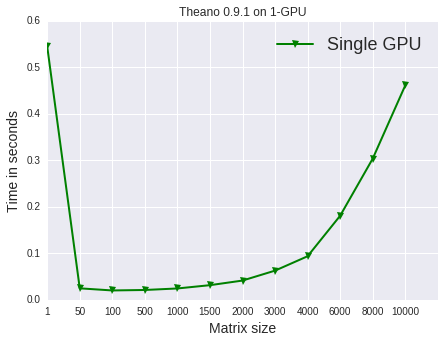

[0.545078, 0.02466, 0.020103, 0.021118, 0.024381, 0.031453, 0.041370000000000004, 0.062745, 0.093651, 0.18077100000000002, 0.30348699999999995, 0.461028]


In [3]:
import theano
import theano.sandbox.cuda
theano.sandbox.cuda.use("gpu0") # using a GPU
print 'Theano version:', theano.__version__

from theano import tensor as T
from theano import function, scan

import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set() # use seaborn plotting defaults

n = 2
matrix_size = [2, 50, 100, 500, 1000, 1500, 2000, 3000, 4000, 6000, 8000, 10000]

theano_time = []

for s in matrix_size:
    
    t1_begin = datetime.datetime.now()

    a = T.dmatrix('a')      # declare variable
    b = T.dmatrix('b')
    ap = T.pow(a, n)
    bp = T.pow(b, n)
    
    c = ap + bp         # build symbolic expression
    #c = a**n + b**n         # build symbolic expression
     
    f = function([a, b], c) # compile function

    t1_end = datetime.datetime.now()
    compile_time = (t1_end- t1_begin).total_seconds()
    #print "Compilation time: " + str(compile_time)
    
    A = np.random.rand(s, s).astype('float32')
    B = np.random.rand(s, s).astype('float32')
    t2_begin = datetime.datetime.now()
    f(A, B)    
    
    t2_end = datetime.datetime.now()
    run_time = (t2_end- t2_begin).total_seconds()
    total_time = compile_time + run_time
    theano_time.append(total_time)
    print 'Matrix size:', A.shape , 'Compile:', str(compile_time), 'Run:', str(run_time), 'Total time:', str(total_time)

    
labels = ['1', '50', '100', '500', '1000', '1500', '2000', '3000', '4000', '6000', '8000', '10000']
x = [i for i in range(len(labels))]
fig = plt.figure(figsize=(7, 5))
figure = plt.gcf()

plt.plot(theano_time, marker='v', linestyle='-', color='green', linewidth=2, label='Single GPU')
plt.xticks(x, labels)

plt.title('Theano 0.9.1 on 1-GPU')
plt.xlabel('Matrix size', fontsize='14')
plt.ylabel('Time in seconds', fontsize='14')
plt.legend(loc='best', fontsize='18')
plt.show()

print theano_time

In [ ]:
labels = ['50', '100', '500', '1000', '1500', '2000', '3000', '4000', '6000', '8000', '10000']

x = [i for i in range(len(labels))]

# TensorFlow 0.7.1
single_gpu_071 = [0.005299, 0.006305, 0.012287, 0.028733, 0.052875, 0.103011, 0.22313, 0.354109, 0.74593, 1.308769, 2.055922]
multi_gpu_071 = [0.00772, 0.006099, 0.010816, 0.021379, 0.045656, 0.078372, 0.137304, 0.240004, 0.523093, 0.911741, 1.514064]

# TensorFlow 0.8
single_gpu_08 = [0.007697, 0.007412, 0.021353, 0.044482, 0.107647, 0.152225, 0.371428, 0.597583, 1.261837, 2.205294, 3.44751]
multi_gpu_08 = [0.005094, 0.005267, 0.018319, 0.046661, 0.140644, 0.17001, 0.34707, 0.555248, 1.262252, 2.088138, 3.350551]

# Theano 0.9.1
theano_time= [0.02466, 0.020103, 0.021118, 0.024381, 0.031453, 0.041370000000000004, 0.062745, 0.093651, 0.18077100000000002, 0.30348699999999995, 0.461028]]

fig = plt.figure(figsize=(7, 5))
figure = plt.gcf()

plt.plot(single_gpu_071, marker='v', linestyle='-', color='green', linewidth=2, label='TensorFlow 0.7.1 1-GPU')
plt.plot(multi_gpu_071, marker='H', linestyle='-', color='green', linewidth=2, label='TensorFlow 0.7.1 2-GPU')

plt.plot(single_gpu_08, marker='v', linestyle='-', color='red', linewidth=2, label='TensorFlow 0.8 1-GPU')
plt.plot(multi_gpu_08, marker='H', linestyle='-', color='red', linewidth=2, label='TensorFlow 0.8 2-GPU')

plt.plot(theano_time, marker='o', linestyle='--', color='black', linewidth=2, label='Theano 1-GPU')
plt.xticks(x, labels)

plt.title('TensorFlow 0.7.1 vs. 0.8 vs. Theano 0.9.1 on $A^n + B^n$ task (n=30)')
plt.xlabel('Matrix size', fontsize='14')
plt.ylabel('Time in seconds', fontsize='14')
plt.legend(loc='best', fontsize='18')
plt.show()
fig.savefig('TensorFlow_vs_Theano.png')
plt.close(fig)
